# CNN Model w/ Keras

The following notebook demonstrates how to use preprocessed images to train a convolutional neural network (CNN), save keras models and make predictions on batches of images.

## Index

    1. Training a CNN model using Keras
    2. Summary of the trained CNN model
    3. How to save a trained Keras model
    4. How to make use the model to make a prediction for a single image (with visualisation) 
    5. How to make predictions for a batch of images (with visualisation) 

In [20]:
import os
import sys

top_level = os.getcwd() + '/..'
sys.path.append(top_level)

## 1. Training a CNN model using Keras

The following CNN model contains the following layers: 

    1. Convolutional Layer 2 (relu)
    2. Pooling layer 1
    3. Convolutional Layer 2 (relu)
    4. Pooling layer 2
    5. Flattening layer 
    6. Dense Layer 1 (relu) 
    7. Output Layer (sigmoid) 

In [69]:
import os 
import time
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

from keras.preprocessing.image import ImageDataGenerator

# Kill warnings from Tensorflow
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
TRAINING_DIR  = '../grey_images/training'
TESTING_DIR = '../grey_images/testing'

time_0 = time.time()
    
classifier = Sequential()

# Convolve layer 1 
classifier.add(Convolution2D(32, (3,3), input_shape=(64,64,3), activation="relu"))
# Pool layer 1 
classifier.add(MaxPooling2D(pool_size= (2,2)))

# Convolve layer 2 
classifier.add(Convolution2D(64, (3,3), activation="relu"))

# Pool layer 2 
classifier.add(MaxPooling2D(pool_size= (2,2)))

classifier.add(Flatten())

classifier.add(Dense(activation="relu", units = 128))
classifier.add(Dense(activation="sigmoid", units= 1)) # Output layer

classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])


# Fitting the CNN to the images

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(64,64),
    batch_size=32,
    class_mode="binary"
)

test_set = test_datagen.flow_from_directory(
    TESTING_DIR,
    target_size=(64,64),
    batch_size=32,
    class_mode="binary"
)

classifier.fit_generator(
    training_set,
    steps_per_epoch=500,
    epochs=15,
    validation_data=test_set,
    validation_steps=125
)


duration = time.time() - time_0 
print("Time elapsed: {}m {}s".format(duration / 60, duration % 60))

Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/15
500/500 [==============================] - 76s - loss: 0.6305 - acc: 0.6305 - val_loss: 0.5230 - val_acc: 0.7500
Epoch 2/15
500/500 [==============================] - 73s - loss: 0.5040 - acc: 0.7518 - val_loss: 0.4901 - val_acc: 0.7665
Epoch 3/15
500/500 [==============================] - 74s - loss: 0.4313 - acc: 0.7999 - val_loss: 0.4854 - val_acc: 0.7798
Epoch 4/15
500/500 [==============================] - 74s - loss: 0.3695 - acc: 0.8322 - val_loss: 0.5069 - val_acc: 0.7835
Epoch 5/15
500/500 [==============================] - 73s - loss: 0.3106 - acc: 0.8642 - val_loss: 0.4887 - val_acc: 0.7880
Epoch 6/15
500/500 [==============================] - 73s - loss: 0.2475 - acc: 0.8992 - val_loss: 0.5362 - val_acc: 0.7788
Epoch 7/15
500/500 [==============================] - 76s - loss: 0.2048 - acc: 0.9134 - val_loss: 0.5483 - val_acc: 0.8027
Epoch 8/15
500/500 [=============================

## 2. Summary of a classifier

After a classifier has been fit, the summary can be obtained: 

In [74]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total para

In [79]:
classifier.get_config()

[{'class_name': 'Conv2D',
  'config': {'activation': 'relu',
   'activity_regularizer': None,
   'batch_input_shape': (None, 64, 64, 3),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'data_format': 'channels_last',
   'dilation_rate': (1, 1),
   'dtype': 'float32',
   'filters': 32,
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_regularizer': None,
   'kernel_size': (3, 3),
   'name': 'conv2d_13',
   'padding': 'valid',
   'strides': (1, 1),
   'trainable': True,
   'use_bias': True}},
 {'class_name': 'MaxPooling2D',
  'config': {'data_format': 'channels_last',
   'name': 'max_pooling2d_9',
   'padding': 'valid',
   'pool_size': (2, 2),
   'strides': (2, 2),
   'trainable': True}},
 {'class_name': 'Conv2D',
  'config': {'activation': 'relu',
   'activity_

## 3. How to save/load Keras models

A keras model contains: 
- the architecture of the model, allowing to re-create the model
- the weights of the model
- the training configuration (loss, optimizer)
- the state of the optimizer, allowing to resume training exactly where you left off.

References: 
- https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model
- https://keras.io/models/about-keras-models/

In [78]:
SAVE_DIR = "../models/my_model.h5"

classifier.save(SAVE_DIR)

# DELETE MODEL AFTER SAVING
del model

To load model:

In [23]:
from keras.models import load_model

LOAD_DIR = '../models/my_model_1600_400.h5'

model = load_model(LOAD_DIR)

**To only save the architecture, weights etc., check the documentation reference**

In [4]:
from keras.models import load_model

LOAD_DIR = '../models/my_model.h5'

loaded_model = (LOAD_DIR)

## 4. How to make use the model to make a prediction for a single image (with visualisation) 


The following script predicts an image using the following process:

1. Loads the model from the hdf5 file
2. Reads the image to predict from file
3. Resizes and converts the image to greyscale
4. Expanded shape from [a, b] to [a, b, 3] 

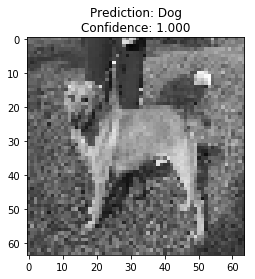

In [13]:
'''
The purprose of this script is to make predictions for a photo
'''

import os
import sys

top_level = os.getcwd() + '/..'
sys.path.append(top_level)

import scipy
import tensorflow as tf
from keras.models import load_model
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from methods import (
    read_image_and_set_shape,
    convert_to_greyscale,
    resize_image_with_new_shape,
    grab_random_samples_from_dir
)

# Kill Tensorflow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
LOAD_DIR = '../models/my_model.h5'

# Dictionary
dict_ = {
    '0' : "Cat",
    '1' : "Dog"
}

'''
Preprocess image before prediction
'''

# Load model into memory
cnn_model = load_model(LOAD_DIR)

# Read prediction image
# image = read_image_and_set_shape("train/cat_samples/cat.343.jpg")
image = read_image_and_set_shape("../train/dogs/dog.1005.jpg")


# # Resize image
resized_image = resize_image_with_new_shape(image, [64,64])

#Greyscale image
greyscale_image = convert_to_greyscale(resized_image)

x = tf.Variable(greyscale_image, name='x')
model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    result = session.run(x)

# Reexpand shape from (64, 64) to (64, 64, 3)
result = np.stack((result,) * 3, axis=2)

# Predictions require an input of 4 dimenions. In other words, an array of image arrays
results = np.array([result])


'''
Make predictions
'''

prediction = cnn_model.predict(results).tolist()[0][0]
label = dict_["1" if prediction > 0.5 else "0"]
confidence = prediction if prediction > 0.5 else (1 - result)
del cnn_model

'''
Show prediction image, just uncomment this to view

'''

# Squeeze image to plot
result = np.squeeze(result)
imgplot = plt.imshow(result)
imgplot.set_cmap('gray')

plt.title(
    "Prediction: {}\nConfidence: {:5.3f}".format(label, confidence))
plt.show(imgplot)


## 5. How to make predictions for a batch of images (with visualisation) 

To set subplot at equal size: https://stackoverflow.com/questions/14770735/changing-figure-size-with-subplots

RESULTS:
********************
Accuracy of model:0.8750
********************


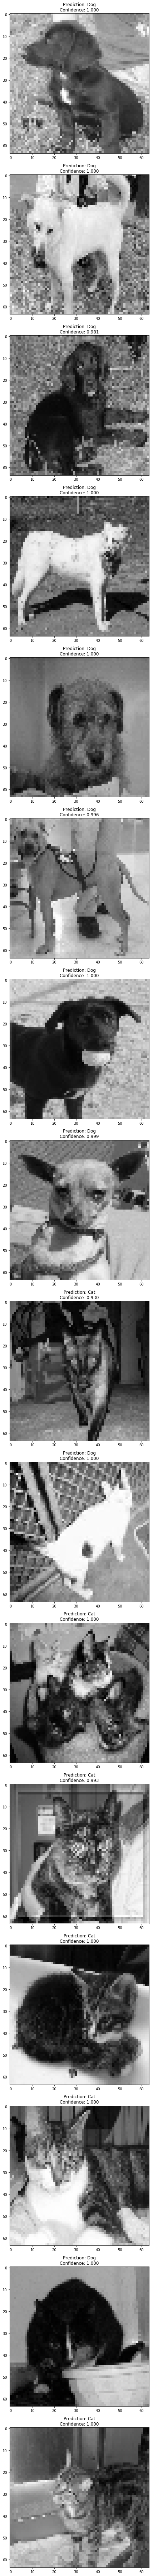

In [19]:
'''
The purprose of this script is to make predictions for a photo
'''

import os
import scipy
import tensorflow as tf
from keras.models import load_model
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from methods import (
    read_image_and_set_shape,
    convert_to_greyscale,
    resize_image_with_new_shape,
    grab_random_samples_from_dir,
    FILLER
)

# Kill Tensorflow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

'''
SETUP
'''
dict_ = {
    '0' : "Cat",
    '1' : "Dog"
}

RANDOM_COUNT = 8

LOAD_DIR = "../models/my_model_1600_400.h5"
DOG_DIR = "../train/dogs/"
CAT_DIR = "../train/cats/"


'''
Load model into memory
'''
cnn_model = load_model(LOAD_DIR)

'''
Grab random images 
'''
random_dogs = grab_random_samples_from_dir(DOG_DIR, RANDOM_COUNT).tolist()
random_dog_loc = [DOG_DIR + x for x in random_dogs]

random_cats= grab_random_samples_from_dir(CAT_DIR, RANDOM_COUNT).tolist()
random_cats_loc = [CAT_DIR + x for x in random_cats]

images = random_dog_loc + random_cats_loc

# Generate test labels (e.g. y_test)
y_test = ["Dog" if "dogs" in name else "Cat" for name in images]

operations = []

'''
Convert images by resizing and greyscaling
'''

# Read prediction image
for i in images: 
    image = read_image_and_set_shape(i)
    resized_image = resize_image_with_new_shape(image, [64,64])
    greyscale_image = convert_to_greyscale(resized_image)
    operations.append(tf.Variable(greyscale_image, name='{}'.format(i)))
    
model = tf.global_variables_initializer()

results = []

with tf.Session() as session:
    session.run(model)
    
    for i in range(0, len(operations)):
        result = session.run(operations[i])
        result = np.stack((result,) * 3, axis=2) # Re-expand shape from (64, 64) to (64, 64, 3)
        # Predictions require an input of 4 dimenions. In other words, an array of image arrays
        results.append(result)

        
results = np.array(results)

'''
Make predictions
'''    

pred = cnn_model.predict(results).tolist()
discrete_pred = [dict_["1"] if x[0] > 0.5 else dict_["0"] for x in pred]

from sklearn.metrics import accuracy_score
acc = accuracy_score(discrete_pred, y_test)

print("RESULTS:\n{}\nAccuracy of model:{:5.4f}\n{}".format(FILLER, acc, FILLER))

del cnn_model

'''
**VISUALISATION**

Show prediction image, just uncomment this to view

'''

fig, axarr = plt.subplots(len(results),1)
fig.set_figheight(100, forward=True)
fig.set_figwidth(100, forward=True)

for i in range(0, len(results)):
    result = pred[i][0]
    label = dict_["1" if result > 0.5 else "0"]
    confidence = result if result > 0.5 else (1 - result)
    axarr[i].set_title(
        "Prediction: {}\nConfidence: {:5.3f}".format(label, confidence))
    grayplot = axarr[i].imshow(results[i])
    grayplot.set_cmap('gray')

plt.tight_layout()
plt.axis('scaled')
plt.show()
